In [24]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import random

# set random seed
random.seed(0)

In [25]:
img_dir = "./DOTAv10/data_train_2_5_gb/split_ss_dota_1024_200/val/images"
ann_dir = "./DOTAv10/data_train_2_5_gb/split_ss_dota_1024_200/val/annfiles"
pred_ann_dir = "./DOTAv10/data_train_2_5_gb/split_ss_dota_1024_200/val/pseudo_obb_labelTxt_dota_pointobb"

img_list = sorted(os.listdir(img_dir))
ann_list = sorted(os.listdir(ann_dir))
pred_ann_list = sorted(os.listdir(pred_ann_dir))

print(len(img_list))
print(len(ann_list))
print(len(pred_ann_list))

501
501
501


In [26]:
# Function to draw OBBs on an image
def draw_obb(image, obb_labels, width, height, scale=1, color=(255, 0, 0), plot_center=False):
    overlay = image.copy()
    for obb in obb_labels:
        points = np.array(list(map(float, obb[:8]))).reshape((4, 2))
        label = obb[8]
        score = obb[9]

        # # Convert normalized coordinates to absolute pixel values
        # points[:, 0] *= width  # Convert x-coordinates
        # points[:, 1] *= height # Convert y-coordinates
        # points *= scale  # Scale if needed
        points = points.astype(int)

        # Draw edges
        for i in range(4):
            p1, p2 = tuple(points[i]), tuple(points[(i + 1) % 4])
            cv2.line(overlay, p1, p2, color, 2)
        # draw center
        if plot_center:
            center = np.mean(points, axis=0).astype(int)
            cv2.circle(overlay, tuple(center), 5, (0, 0, 255), -1)

    return overlay

# Read annotation file
def read_anns(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    annotations = []
    for line in lines:
        parts = line.strip().split()
        # print(parts)
        annotations.append(parts)
    return annotations

# plot ann and pred_ann on image
def plot_anns(image, ann_labels, pred_labels):
    H, W = image.shape[:2]
    fig, ax = plt.subplots(1, 2, figsize=(12, 6))

    # Draw annotations
    ann_image = draw_obb(image.copy(), ann_labels, W, H, plot_center=True)
    ax[0].imshow(ann_image)
    ax[0].set_title('Original Annotations')
    ax[0].axis('off')

    pred_image = draw_obb(image.copy(), pred_labels, W, H, plot_center=True)
    ax[1].imshow(pred_image)
    ax[1].set_title('Predictions')
    ax[1].axis('off')

    plt.show()

In [27]:
num_images = 10
img_names = random.sample([img.split(".")[0] for img in img_list], num_images)
print(len(img_names))


10


Number of annotations: 110
Number of predictions: 110


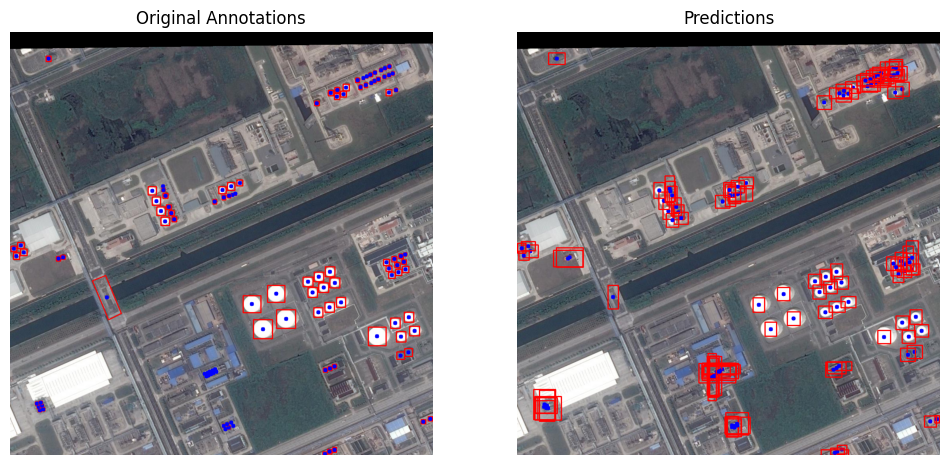

Number of annotations: 0
Number of predictions: 0


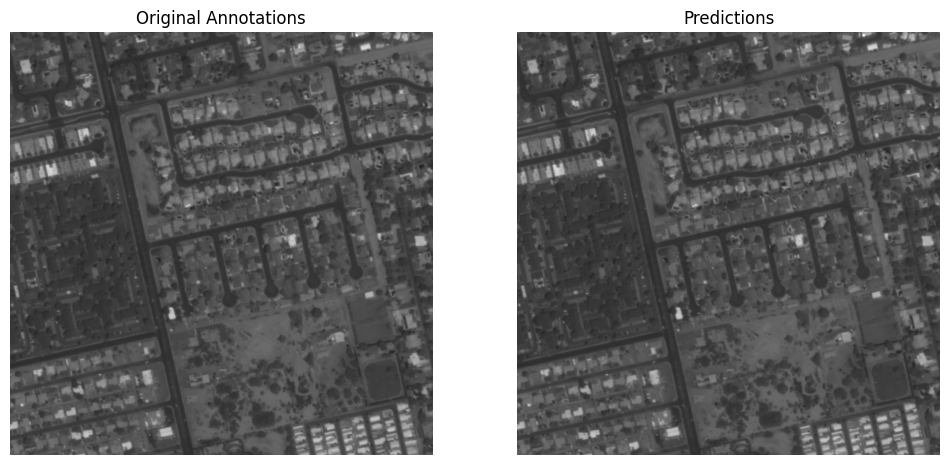

Number of annotations: 46
Number of predictions: 46


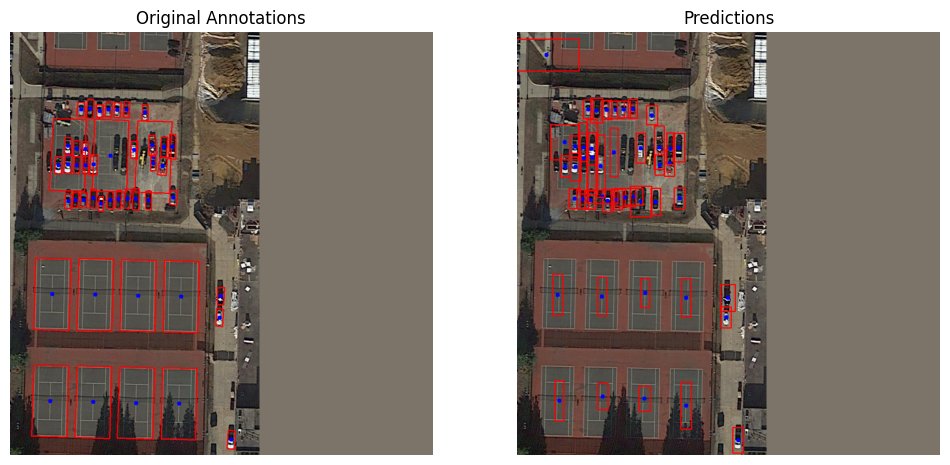

Number of annotations: 0
Number of predictions: 0


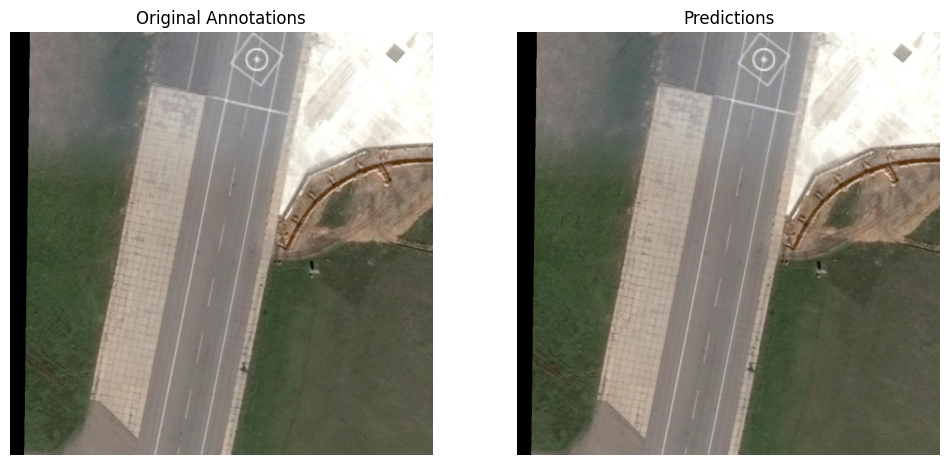

Number of annotations: 0
Number of predictions: 0


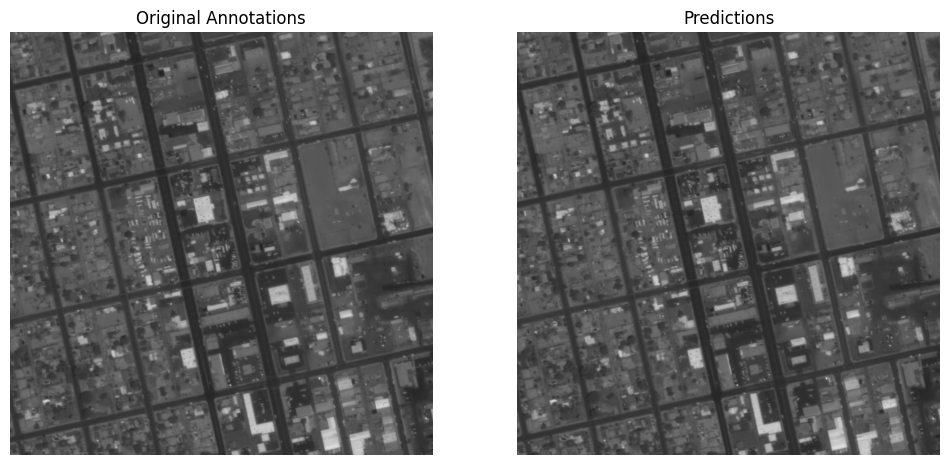

Number of annotations: 15
Number of predictions: 15


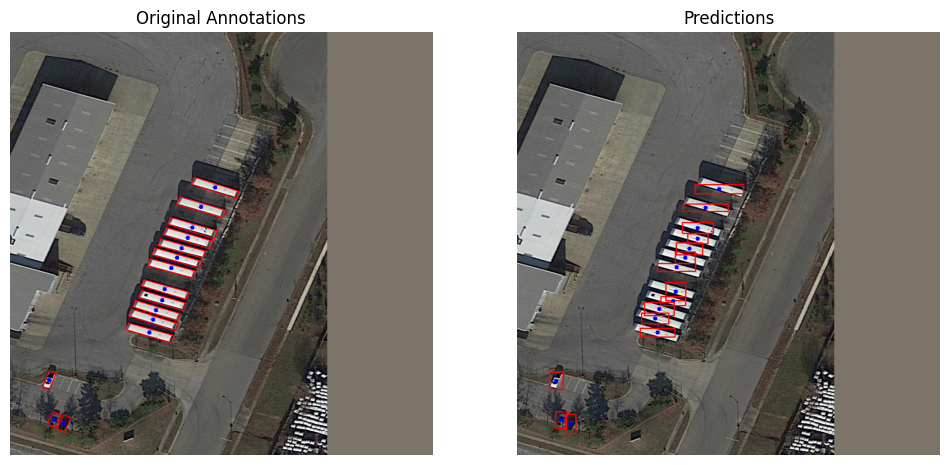

Number of annotations: 0
Number of predictions: 0


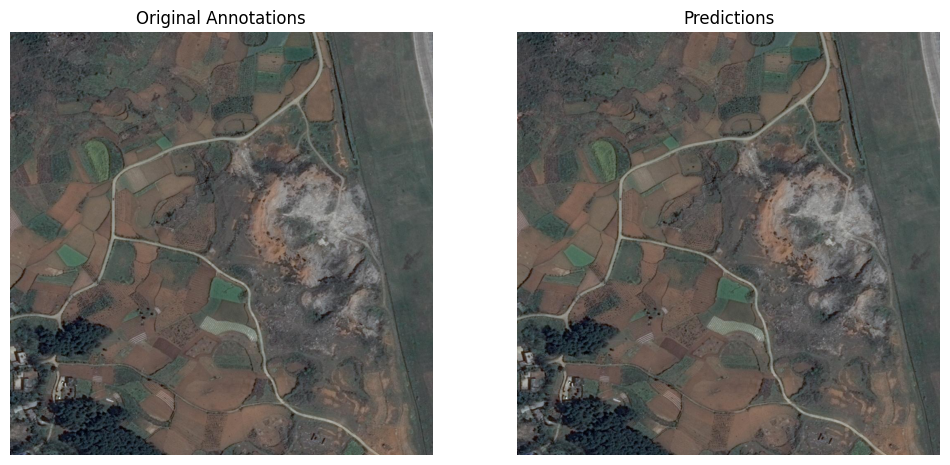

Number of annotations: 2
Number of predictions: 2


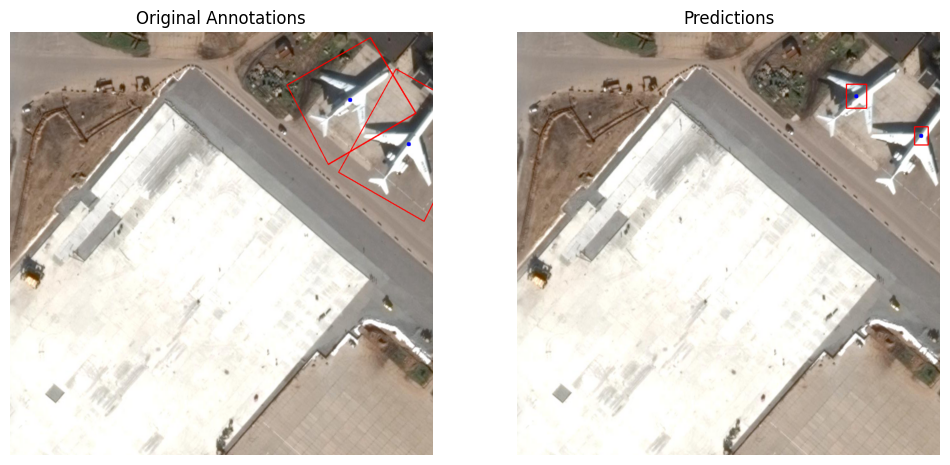

Number of annotations: 2
Number of predictions: 2


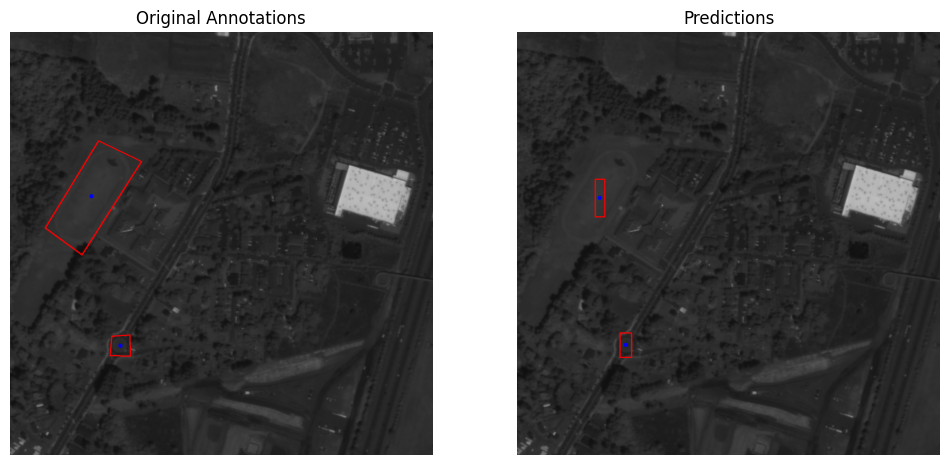

Number of annotations: 0
Number of predictions: 0


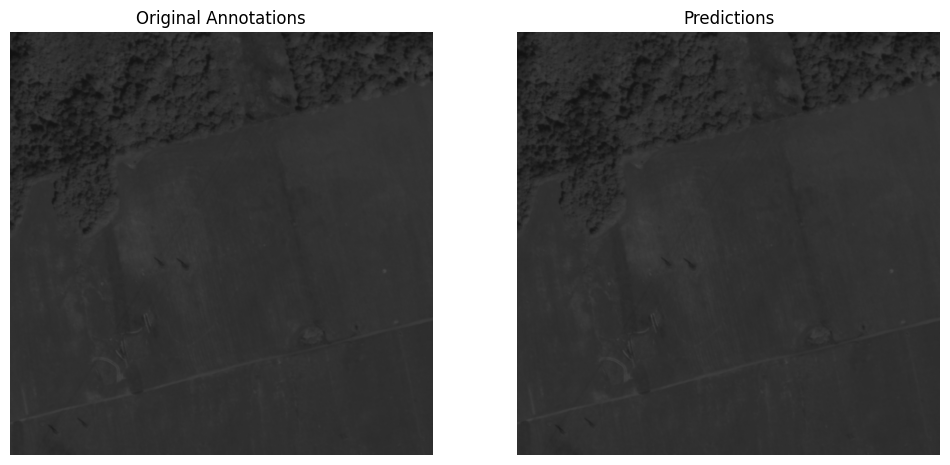

In [28]:
for i in range(len(img_names)):
    img_name = img_names[i]
    img_path = os.path.join(img_dir, img_name + ".png")
    ann_path = os.path.join(ann_dir, img_name + ".txt")
    pred_ann_path = os.path.join(pred_ann_dir, img_name + ".txt")

    image = cv2.imread(img_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    ann_labels = read_anns(ann_path)
    pred_labels = read_anns(pred_ann_path)
    print("Number of annotations:", len(ann_labels))
    print("Number of predictions:", len(pred_labels))
    
    plot_anns(image, ann_labels, pred_labels)